# Handwritten digits classification using CNN

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorboard as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

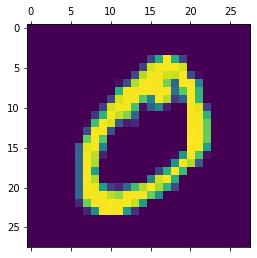

In [10]:
plt.matshow(X_train[1])

In [12]:
y_train[1]

0

In [15]:
# Scaling 

X_train = X_train / 225
X_test = X_test / 225

### Using ANN for classification

In [16]:
ann = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [18]:
ann.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
6000/6000 [==============================] - 5s 821us/step - loss: 0.2208 - accuracy: 0.9349
Epoch 2/10
6000/6000 [==============================] - 5s 801us/step - loss: 0.0998 - accuracy: 0.9695
Epoch 3/10
6000/6000 [==============================] - 5s 835us/step - loss: 0.0741 - accuracy: 0.9772
Epoch 4/10
6000/6000 [==============================] - 5s 813us/step - loss: 0.0552 - accuracy: 0.9825
Epoch 5/10
6000/6000 [==============================] - 5s 894us/step - loss: 0.0446 - accuracy: 0.9855
Epoch 6/10
6000/6000 [==============================] - 5s 826us/step - loss: 0.0354 - accuracy: 0.9887
Epoch 7/10
6000/6000 [==============================] - 5s 874us/step - loss: 0.0297 - accuracy: 0.9906
Epoch 8/10
6000/6000 [==============================] - 5s 854us/step - loss: 0.0267 - accuracy: 0.9907
Epoch 9/10
6000/6000 [==============================] - 5s 830us/step - loss: 0.0219 - accuracy: 0.9928
Epoch 10/10
6000/6000 [==============================] - 5s 846u

In [19]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 0s 655us/step - loss: 0.0899 - accuracy: 0.9797


[0.08985088020563126, 0.9797000288963318]

In [22]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [25]:
X_test = X_test.reshape(-1, 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

### Using CNN for classification

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters = 30, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 60, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [28]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [30]:
cnn.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 2/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 5/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0082 - accuracy: 0.9973


In [32]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9923


[0.03090243600308895, 0.9922999739646912]

In [35]:
pred = cnn.predict(X_test)
pred[:5]

array([[2.15651817e-05, 1.25290513e-01, 4.51044917e-01, 8.91895592e-01,
        2.83352226e-01, 5.54886460e-03, 9.34413137e-12, 1.00000000e+00,
        7.96234608e-03, 9.28758502e-01],
       [9.96442318e-01, 9.99365449e-01, 1.00000000e+00, 6.69610699e-06,
        5.36441803e-03, 2.17969202e-07, 7.84695029e-01, 1.73926353e-04,
        5.75385094e-01, 1.09318495e-02],
       [8.14157724e-03, 1.00000000e+00, 1.40263140e-02, 4.57447932e-05,
        7.35708237e-01, 4.17276025e-02, 7.29113817e-04, 8.27041626e-01,
        1.20095879e-01, 1.27124190e-02],
       [1.00000000e+00, 1.40722852e-06, 1.19585246e-01, 7.04437494e-04,
        1.26445293e-03, 5.81760406e-02, 9.96972322e-01, 5.45620918e-04,
        1.68644875e-01, 9.61498618e-01],
       [7.31050968e-04, 4.02636886e-01, 7.37105511e-05, 1.00123798e-05,
        1.00000000e+00, 6.45126493e-05, 2.89565325e-03, 7.31356144e-02,
        1.42231882e-02, 9.98882473e-01]], dtype=float32)

In [36]:
y_pred = [np.argmax(i) for i in pred]

In [38]:
def plot_img(X,truth,predict,index):
    plt.imshow(X[index])
    print(f'Truth : {truth[index]}')
    print(f'Prediction : {predict[index]}')    

Truth : 2
Prediction : 2


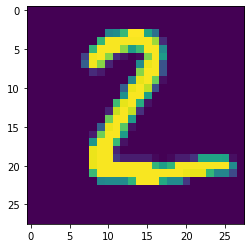

In [44]:
plot_img(X_test,y_test,y_pred,1)

In [45]:
result = pd.DataFrame({"Truth" : y_test, "Prediction" : y_pred})

In [62]:
result.sample(10)

,Truth,Prediction
2510,1,1
5118,8,8
9446,2,2
6214,9,9
3167,3,3
7935,2,2
4697,7,7
5532,7,7
122,7,7
7907,0,0
